In [29]:
import dash
import os
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [30]:
df = pd.read_csv("Transactions_datasheet .csv")

In [31]:
df.head()

,t,success,mid,pmt,pg,sub_type,hr,bank
0,2,1,zivame,NB,PAYU,NaN,2020-02-14 06,NB_CITI
1,1,0,urbanclap,NB,PAYTM,NaN,2020-02-14 06,NB_SYNB
2,5,1,pharmeasytech,WALLET,AIRTELMONEY,REDIRECT_WALLET_DEBIT,2020-02-14 11,AIRTELMONEY
3,1,1,pharmeasytech,CARD,PAYU,NaN,2020-02-14 12,THE SATARA SAHAKARI BANK LTD MUMBAI
4,1,1,fanfight,CARD,RAZORPAY,NaN,2020-02-14 06,DCB


In [32]:
df.shape 

(19307, 8)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19307 entries, 0 to 19306
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   t         19307 non-null  int64 
 1   success   19307 non-null  int64 
 2   mid       19307 non-null  object
 3   pmt       19307 non-null  object
 4   pg        19270 non-null  object
 5   sub_type  2903 non-null   object
 6   hr        19307 non-null  object
 7   bank      18969 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.2+ MB


In [34]:
df['hr'] = pd.to_datetime(df['hr'], format='%Y-%m-%d %H')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19307 entries, 0 to 19306
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   t         19307 non-null  int64         
 1   success   19307 non-null  int64         
 2   mid       19307 non-null  object        
 3   pmt       19307 non-null  object        
 4   pg        19270 non-null  object        
 5   sub_type  2903 non-null   object        
 6   hr        19307 non-null  datetime64[ns]
 7   bank      18969 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 1.2+ MB


In [36]:
df['success rate'] = (df['success'] / df['t']) * 100

In [37]:
print(df[['hr', 'success']].head())

                   hr  success
0 2020-02-14 06:00:00        1
1 2020-02-14 06:00:00        0
2 2020-02-14 11:00:00        1
3 2020-02-14 12:00:00        1
4 2020-02-14 06:00:00        1


In [38]:
df['hour'] = df['hr'].dt.hour
df['date'] = df['hr'].dt.date

# hourly expected success rate
expected_success_rate_per_hour = df.groupby(['date', 'hour'])['success'].mean() * 100

# Normalizing success rate to be between 0 and 100
expected_success_rate_per_hour = (expected_success_rate_per_hour - expected_success_rate_per_hour.min()) / (expected_success_rate_per_hour.max() - expected_success_rate_per_hour.min()) * 100

print(expected_success_rate_per_hour)


date        hour
2020-02-12  0        9.164622
            1       24.457064
            2       64.408551
            3       49.609570
            4       47.186850
                      ...    
2020-02-14  19      21.335275
            20       8.462374
            21       4.040642
            22       1.680513
            23       1.399896
Name: success, Length: 72, dtype: float64


In [39]:
df['success rate'] = (df['success'] / df['t']) * 100

# for three different dates
dates_to_plot = ['2020-02-12', '2020-02-13', '2020-02-14']

In [40]:
grouped = df.groupby(['pmt', 'pg', 'bank', 'sub_type', 'hr'])[['success', 't']].sum().reset_index()
grouped['success_rate'] = (grouped['success'] / grouped['t']) * 100
print(grouped.head())


   pmt         pg bank sub_type                  hr  success     t  \
0  UPI  PAYTM_UPI  UPI  UPI_PAY 2020-02-12 00:00:00       74    97   
1  UPI  PAYTM_UPI  UPI  UPI_PAY 2020-02-12 01:00:00      226   343   
2  UPI  PAYTM_UPI  UPI  UPI_PAY 2020-02-12 02:00:00     1086  1391   
3  UPI  PAYTM_UPI  UPI  UPI_PAY 2020-02-12 03:00:00      379   496   
4  UPI  PAYTM_UPI  UPI  UPI_PAY 2020-02-12 04:00:00      107   162   

   success_rate  
0     76.288660  
1     65.889213  
2     78.073329  
3     76.411290  
4     66.049383  


In [41]:
time_period = 'D'
grouped_time = grouped.groupby(['pmt', 'pg', 'bank', 'sub_type', pd.Grouper(key='hr', freq=time_period)])['success_rate'].mean().reset_index()
print(grouped_time.head())

   pmt         pg bank     sub_type         hr  success_rate
0  UPI  PAYTM_UPI  UPI      UPI_PAY 2020-02-12     66.933497
1  UPI  PAYTM_UPI  UPI      UPI_PAY 2020-02-13     56.185370
2  UPI  PAYTM_UPI  UPI      UPI_PAY 2020-02-14     66.684524
3  UPI   PAYTM_V2  UPI  UPI_COLLECT 2020-02-12     64.190774
4  UPI   PAYTM_V2  UPI  UPI_COLLECT 2020-02-13     53.791200


In [59]:
grouped = df.groupby(['pmt', 'pg', 'bank', 'sub_type', 'hr'])['success'].mean().reset_index()
grouped['success_rate'] = grouped['success'] * 100

In [60]:
grouped.head()

,pmt,pg,bank,sub_type,hr,success,success_rate
0,UPI,PAYTM_UPI,UPI,UPI_PAY,2020-02-12 00:00:00,74.0,7400.0
1,UPI,PAYTM_UPI,UPI,UPI_PAY,2020-02-12 01:00:00,226.0,22600.0
2,UPI,PAYTM_UPI,UPI,UPI_PAY,2020-02-12 02:00:00,1086.0,108600.0
3,UPI,PAYTM_UPI,UPI,UPI_PAY,2020-02-12 03:00:00,379.0,37900.0
4,UPI,PAYTM_UPI,UPI,UPI_PAY,2020-02-12 04:00:00,107.0,10700.0


### Calculating the success rate for each combination of dimensions over time:

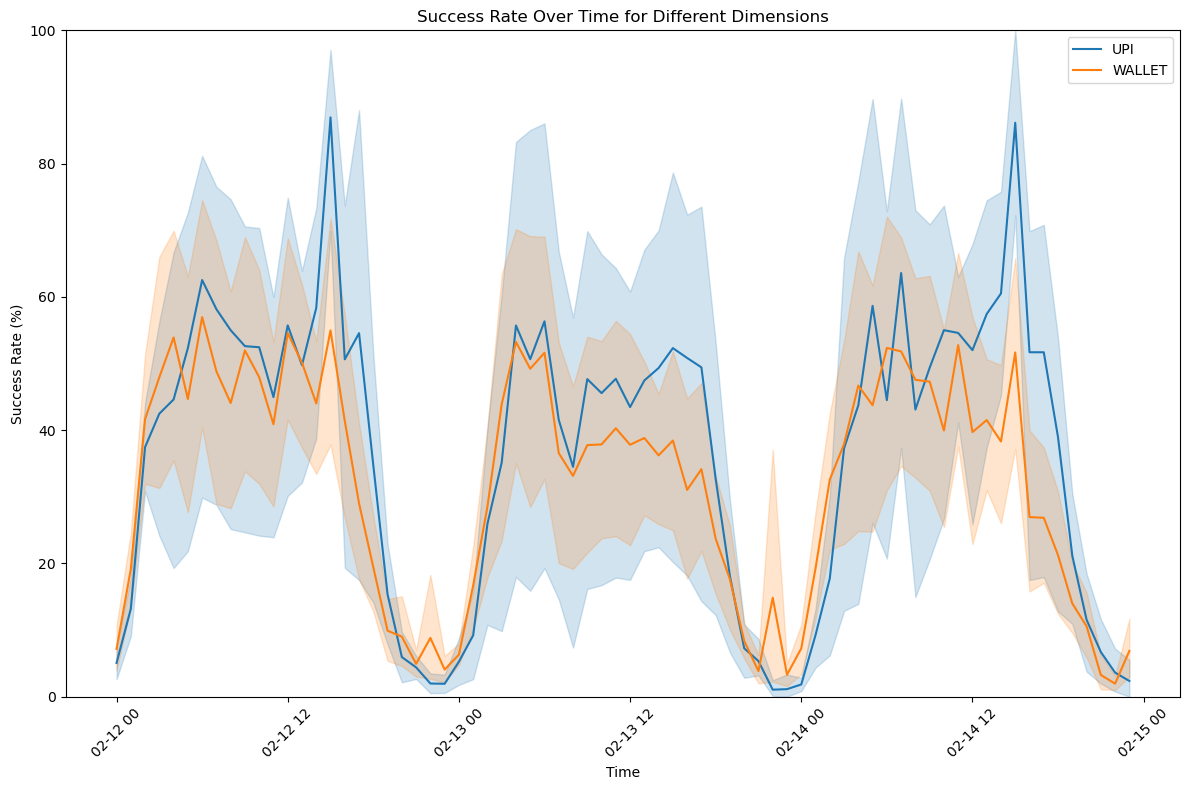

In [43]:
# Group by dimensions and time
grouped_dimensions_time = df.groupby(['pmt', 'pg', 'bank', 'sub_type', 'hr'])['success'].mean() * 100
grouped_dimensions_time = grouped_dimensions_time.reset_index()
pivot_table_dimensions = grouped_dimensions_time.pivot_table(index='hr', columns=['pmt', 'pg', 'bank', 'sub_type'], values='success')
#normalising
pivot_table_dimensions = (pivot_table_dimensions - pivot_table_dimensions.min()) / (pivot_table_dimensions.max() - pivot_table_dimensions.min()) * 100

# Plotting linechart
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_table_dimensions, dashes=False)
plt.title('Success Rate Over Time for Different Dimensions')
plt.xlabel('Time')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 100) 
plt.show()



here we can see that the transaction dataset is showing time series pattern and it has a trend which repeats on a daily basis

### distribution of transactions across different payment methods:

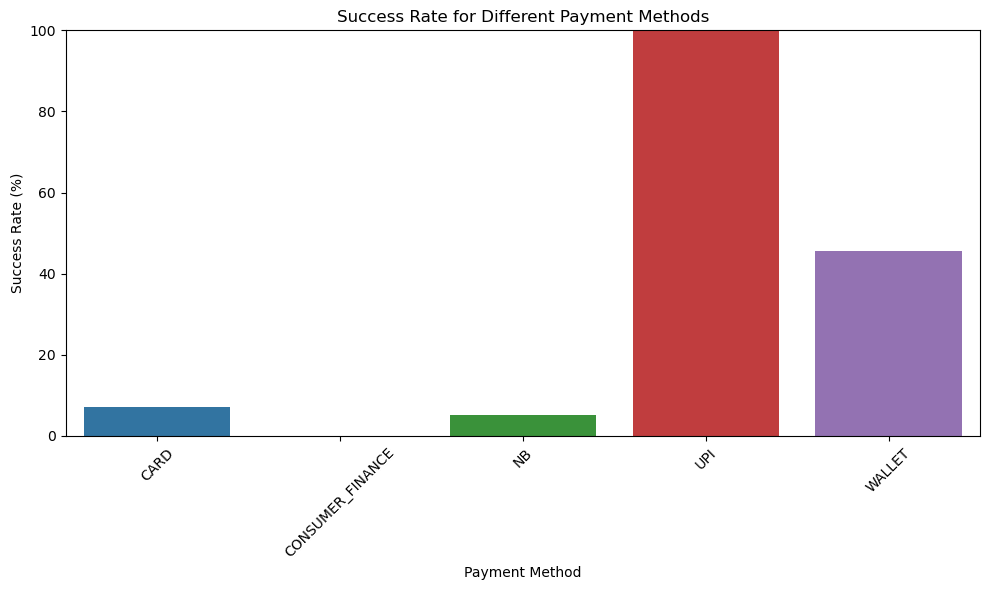

In [44]:
grouped_payment_method = df.groupby('pmt')['success'].mean() * 100

# Normalizing Success rate
grouped_payment_method = (grouped_payment_method - grouped_payment_method.min()) / (grouped_payment_method.max() - grouped_payment_method.min()) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_payment_method.index, y=grouped_payment_method.values)
plt.title('Success Rate for Different Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 100)
plt.show()


### time distribution of transactions:

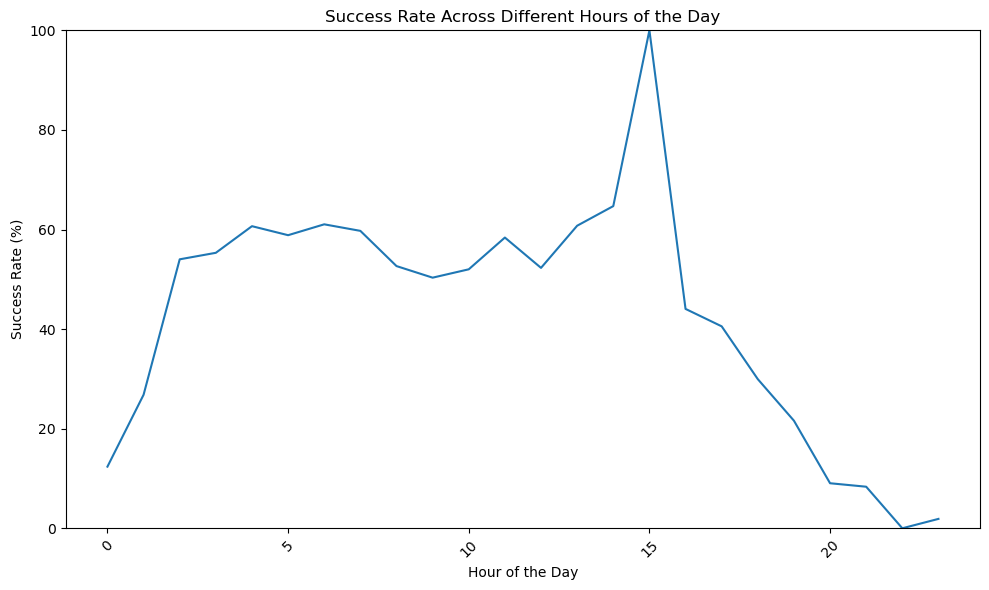

In [57]:
df['hour'] = df['hr'].dt.hour
# Grouping by hour, calculate success rate
grouped_hour = df.groupby('hour')['success'].mean() * 100
grouped_hour = (grouped_hour - grouped_hour.min()) / (grouped_hour.max() - grouped_hour.min()) * 100

# Plot linechart
plt.figure(figsize=(10, 6))
sns.lineplot(x=grouped_hour.index, y=grouped_hour.values)
plt.title('Success Rate Across Different Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 100)
plt.show()


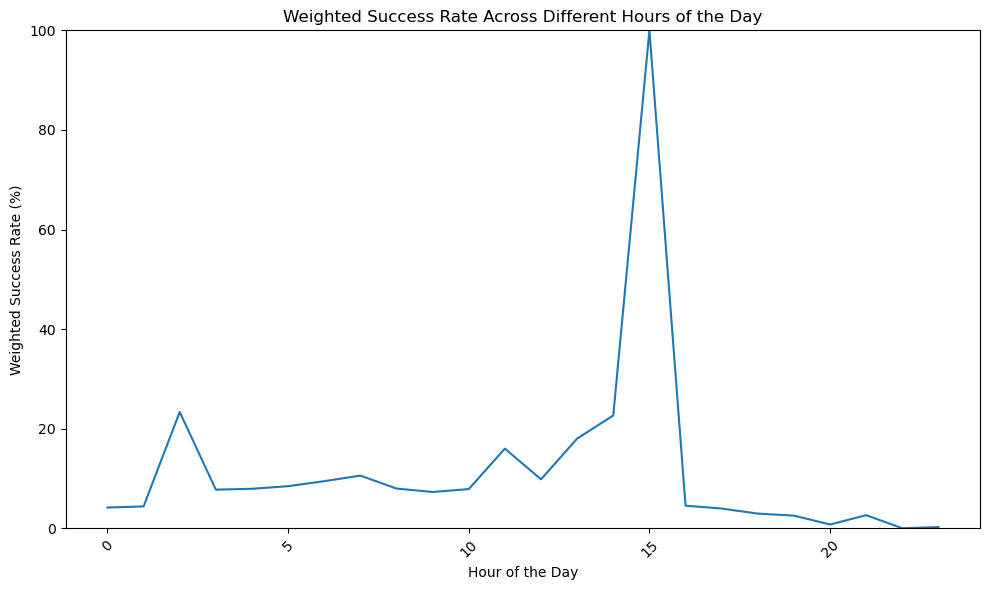

In [58]:
grouped_hour_weighted = df.groupby('hour').apply(lambda x: (x['success'] * x['t']).sum() / x['t'].sum() * 100)

# Normalize weighted success rate to be between 0 and 100
grouped_hour_weighted = (grouped_hour_weighted - grouped_hour_weighted.min()) / (grouped_hour_weighted.max() - grouped_hour_weighted.min()) * 100

# Plotting line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=grouped_hour_weighted.index, y=grouped_hour_weighted.values)
plt.title('Weighted Success Rate Across Different Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Weighted Success Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 100)
plt.show()


#### Plot line chart using seaborn

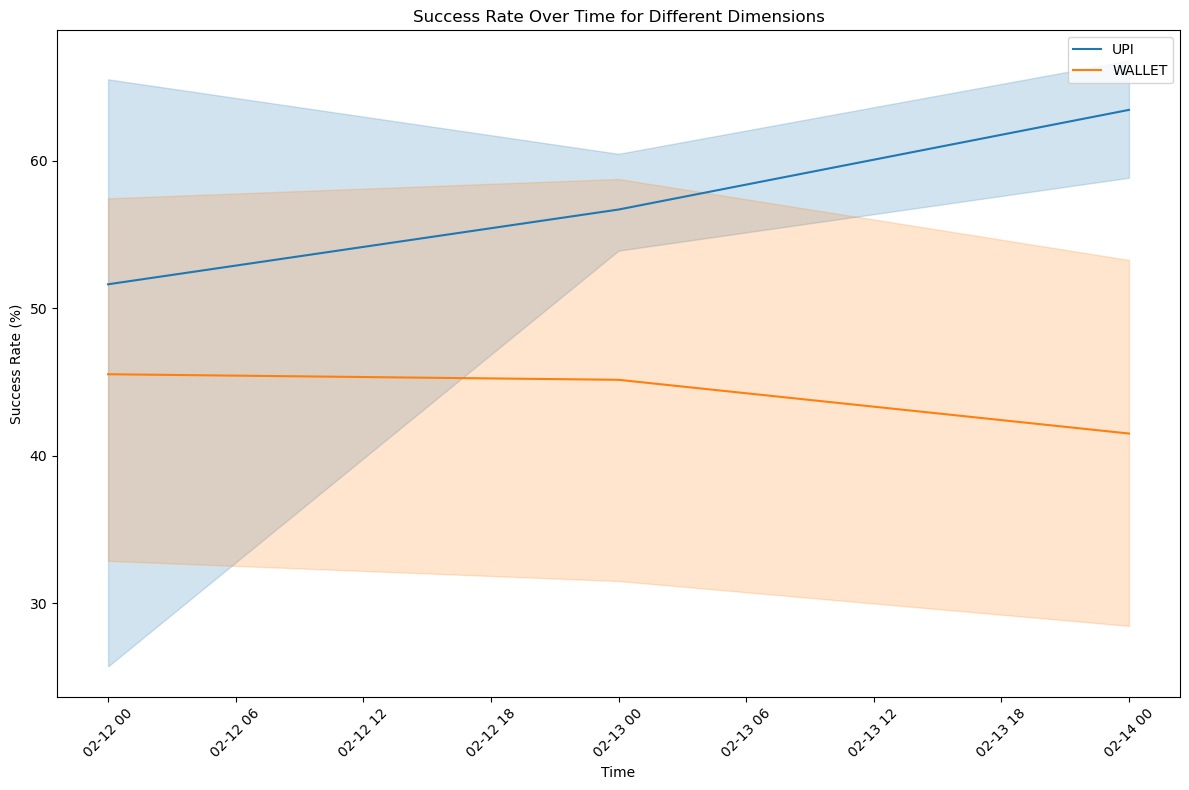

In [46]:
pivot_table = grouped_time.pivot_table(index='hr', columns=['pmt', 'pg', 'bank', 'sub_type'], values='success_rate')
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_table, dashes=False)
plt.title('Success Rate Over Time for Different Dimensions')
plt.xlabel('Time')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Success Rate Based on Payment Methods/Gateways over time:

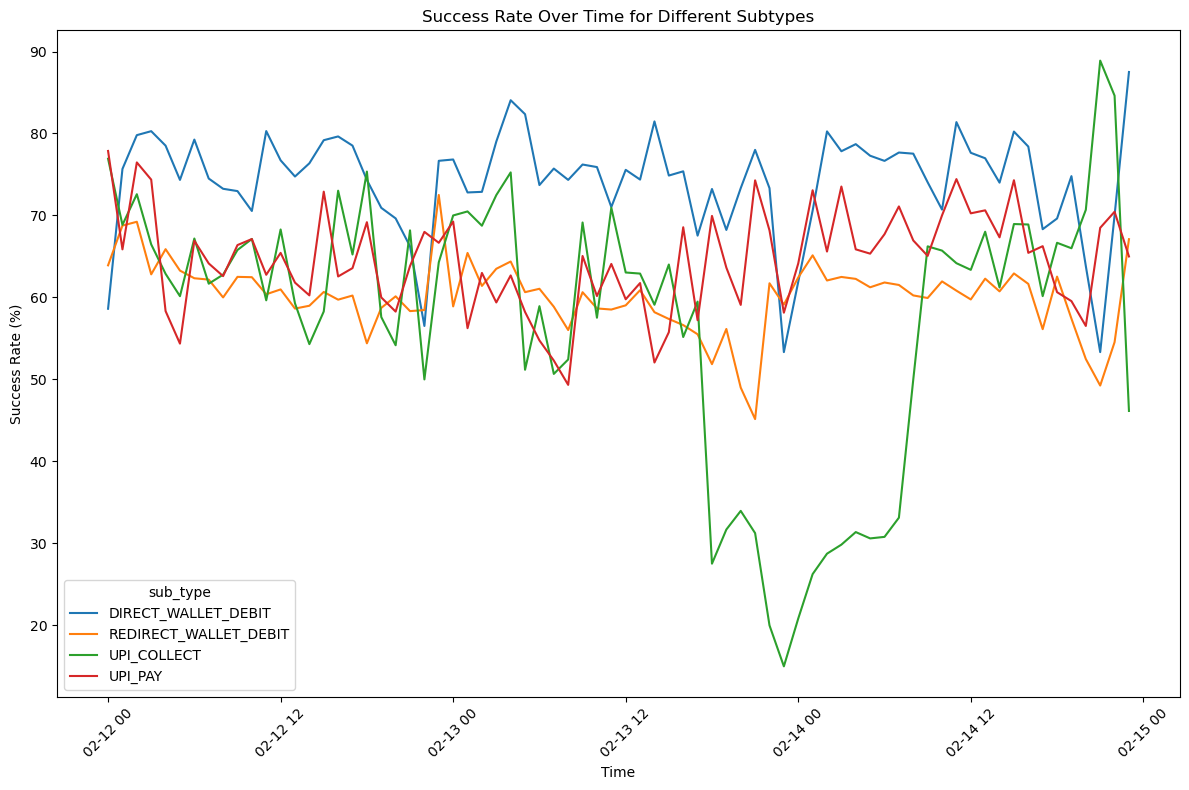

In [47]:
grouped_subtype_time = df.groupby(['sub_type', 'hr'])[['success', 't']].sum() #.sum(), to ensure that we're considering the total count of successful transactions and total transactions for each combination of 'sub_type' and 'hr', which is necessary for calculating the success rate accurately.
#calculatinhg the mean of 'success',would give the average success value, which might not represent the total count of successful transactions for that hour and sub_type combination.
# Calculating success rate as percentage
grouped_subtype_time['success_rate'] = (grouped_subtype_time['success'] / grouped_subtype_time['t']) * 100

grouped_subtype_time = grouped_subtype_time.reset_index()

pivot_table_subtype = grouped_subtype_time.pivot_table(index='hr', columns='sub_type', values='success_rate')

# Plotting line chart
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_table_subtype, dashes=False)
plt.title('Success Rate Over Time for Different Subtypes')
plt.xlabel('Time')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


here we can see that UPI_COLLECT reported the issue of the huge drop in success rate.

### Distribution of Transactions Across Different Hours:

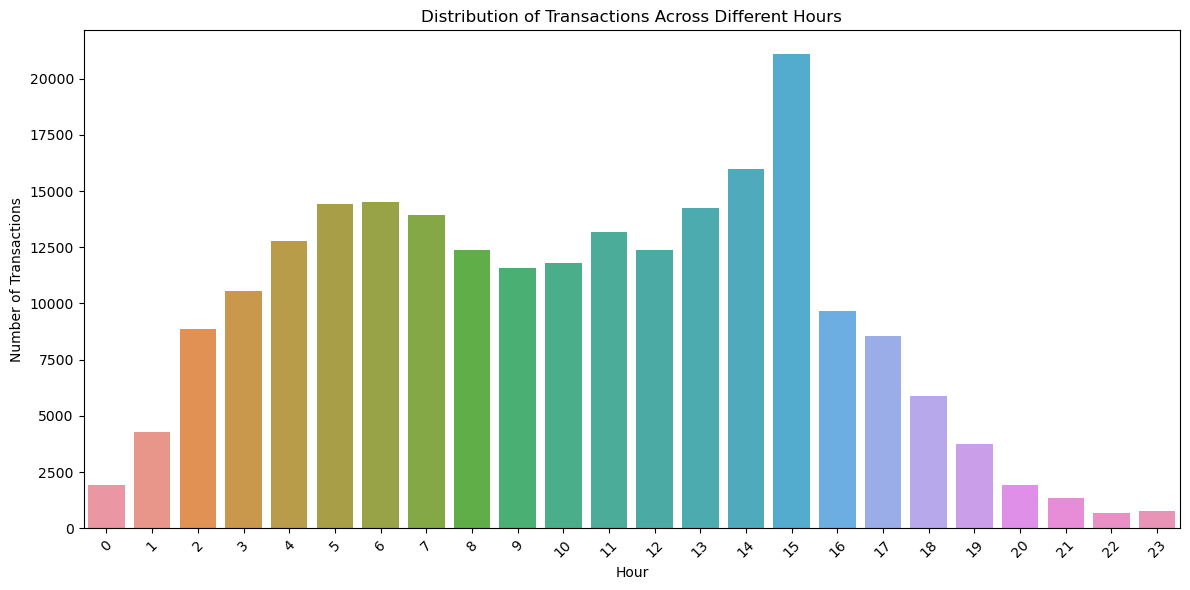

In [49]:
# Grouping by hour to calculate the number of transactions
transactions_by_hour = df.groupby(df['hr'].dt.hour)['t'].sum()
# Plotting Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=transactions_by_hour.index, y=transactions_by_hour.values)
plt.title('Distribution of Transactions Across Different Hours')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### weighted success rate for each combination of payment gateway (pg) and payment method (pmt):

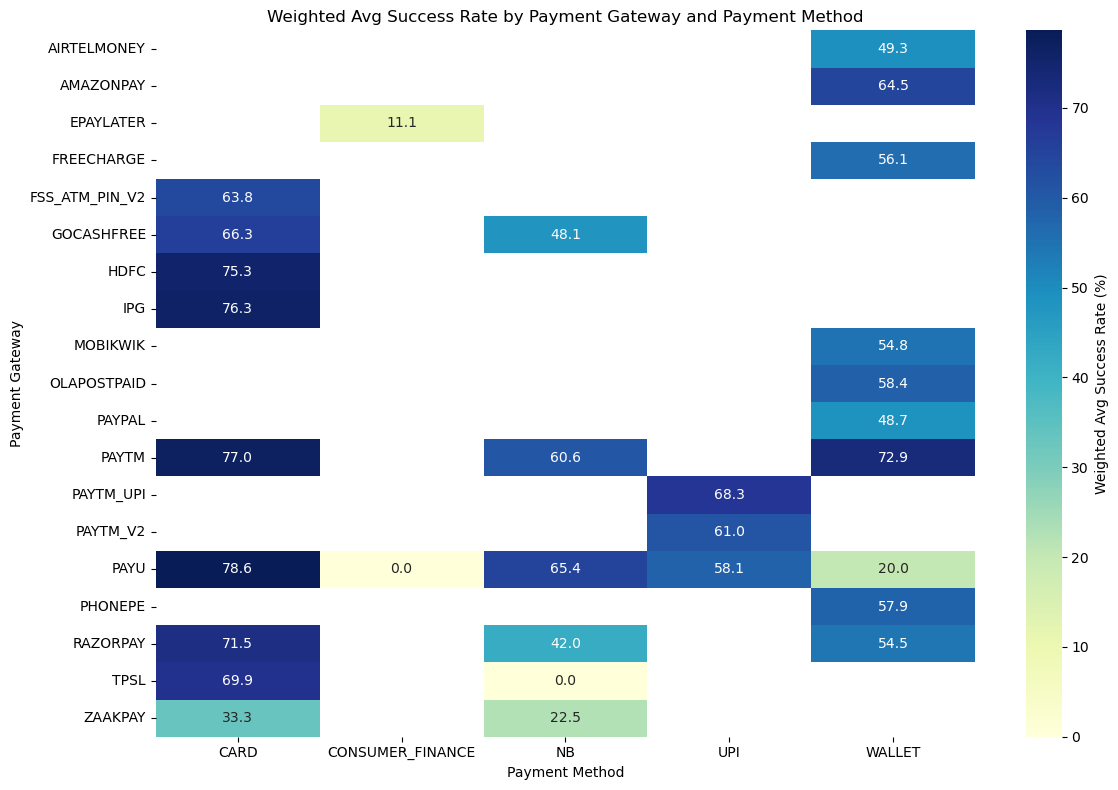

In [50]:
grouped = df.groupby(['pg', 'pmt'])['success rate'].apply(lambda x: (x * df.loc[x.index, 't']).sum() / df.loc[x.index, 't'].sum()).reset_index()

pivot_table = grouped.pivot_table(index='pg', columns='pmt', values='success rate')

# Heatmap creation
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Weighted Avg Success Rate (%)'})
plt.title('Weighted Avg Success Rate by Payment Gateway and Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Payment Gateway')
plt.tight_layout()
plt.show()

## Dashboard Creation

In [51]:
!pip install pandas plotly dash

In [52]:
app = dash.Dash(__name__)

In [53]:
app.layout = html.Div([
    html.H1('Transaction Analysis Dashboard'),

    html.Div([
        dcc.Graph(id='transactions-by-hour'),
        dcc.Graph(id='success-rate-subtypes'),
        dcc.Graph(id='success-rate-dimensions')
    ], className='graphs-container')
])

In [54]:
@app.callback(
    Output('transactions-by-hour', 'figure'),
    Input('transactions-by-hour', 'relayoutData')
)
def update_transactions_by_hour(relayoutData):
    transactions_by_hour = df.groupby(df['hr'].dt.hour)['t'].sum()
    fig = px.bar(x=transactions_by_hour.index, y=transactions_by_hour.values)
    fig.update_layout(
        title='Distribution of Transactions Across Different Hours',
        xaxis_title='Hour',
        yaxis_title='Number of Transactions',
        xaxis=dict(tickmode='linear'),
        xaxis_tickangle=-45,
        xaxis_dtick=1
    )
    return fig
# Defining callback
@app.callback(
    Output('success-rate-subtypes', 'figure'),
    Input('success-rate-subtypes', 'relayoutData')
)
def update_success_rate_subtypes(relayoutData):
    grouped_subtype_time = df.groupby(['sub_type', 'hr'])['success'].mean() * 100

    grouped_subtype_time = grouped_subtype_time.reset_index()
  
    pivot_table_subtype = grouped_subtype_time.pivot_table(index='hr', columns='sub_type', values='success')
    fig = px.line(pivot_table_subtype, title='Success Rate Over Time for Different Subtypes')
    fig.update_layout(
        xaxis_title='Time',
        yaxis_title='Success Rate (%)',
        xaxis_tickangle=-45,
        xaxis_dtick=3600000 
    )
    return fig
# Another callback for Success rate
@app.callback(
    Output('success-rate-dimensions', 'figure'),
    Input('success-rate-dimensions', 'relayoutData')
)
def update_success_rate_dimensions(relayoutData):
    # Grouping by dimensions and time to calculate the success rate.
    grouped = df.groupby(['pmt', 'pg', 'bank', 'sub_type', 'hr'])['success'].mean().reset_index()
    grouped['success_rate'] = grouped['success'] * 100
    
    # Creating a line chart
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=grouped, x='hr', y='success_rate', hue='sub_type', markers=True)
    plt.title('Success Rate Over Time for Different Subtypes')
    plt.xlabel('Time')
    plt.ylabel('Success Rate (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

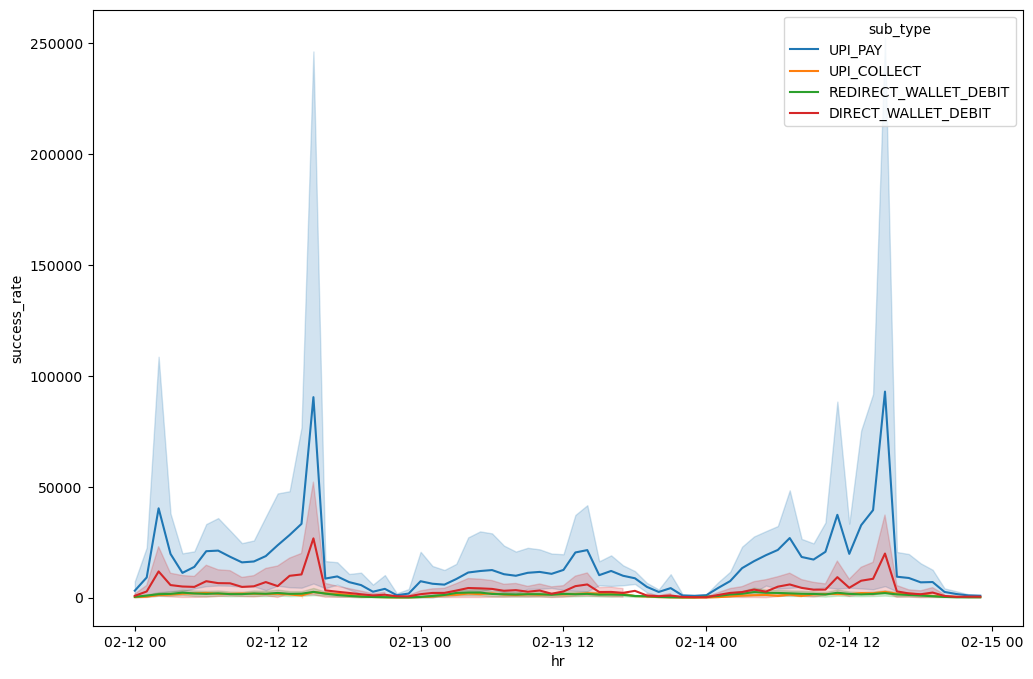

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23988\806439821.py:61: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



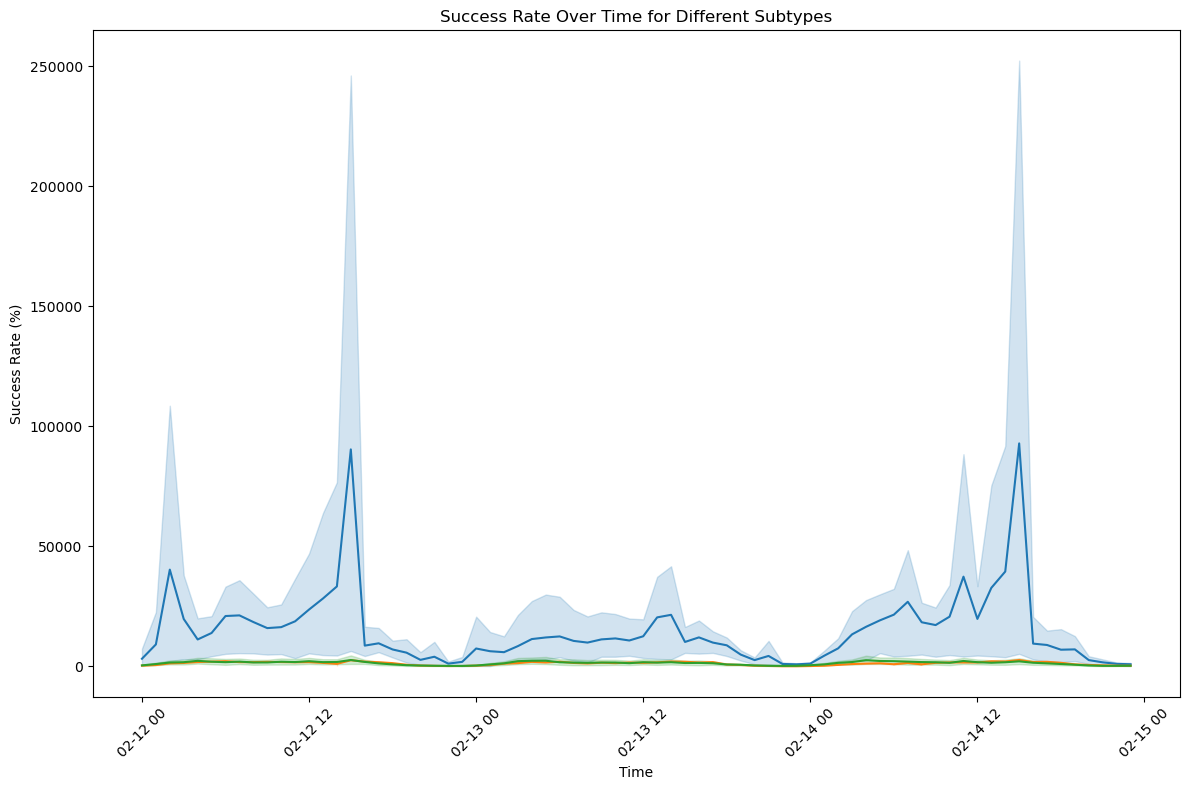

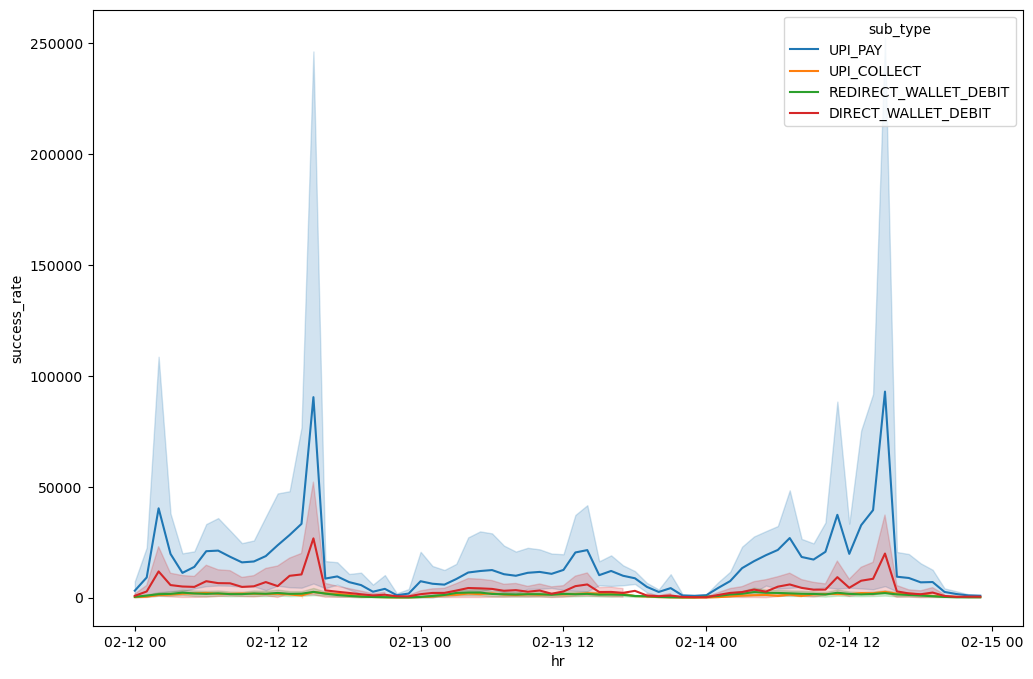

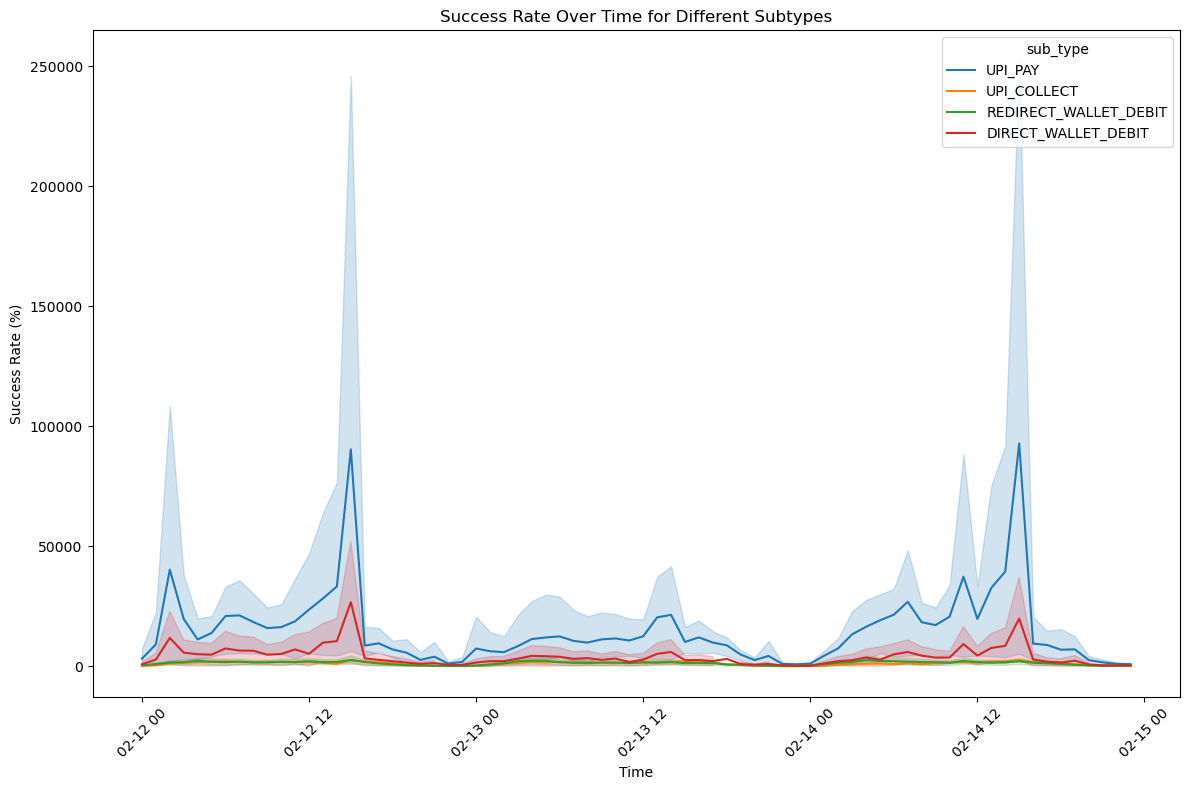

In [55]:
if __name__ == '__main__':
    app.run_server(debug=True)